### Importing python compute and visualization packages

In [25]:

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import copy
import math

In [33]:
x_train = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0])
y_train = np.array([300.0, 500.0, 700.0, 900.0, 1100.0, 1300.0])
print(f'{x_train} \n{y_train}')

[1. 2. 3. 4. 5. 6.] 
[ 300.  500.  700.  900. 1100. 1300.]


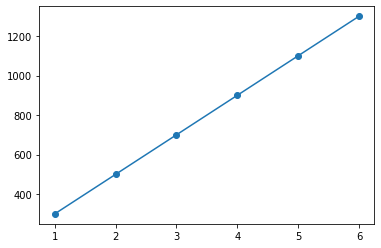

In [27]:
plt.plot(x_train, y_train)
plt.scatter(x_train, y_train)

In [28]:
#Function to calculate the cost
def cost_computation(x_values, y_values, w, b):
    m = x_values.shape[0] 
    cost = 0
    
    for i in range(m):
        function_wb = w * x_values[i] + b
        cost = cost + (function_wb - y_values[i])**2
    total_cost = (1 / (2 * m)) * cost

    return total_cost

![Gradient](attachement:gradient01.png)

*Gradient Descent* is described as follows:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
where, parameters $w$, $b$ are updated simultaneously.  

In [29]:
def gradient_computation(x, y, w, b): 
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    for i in range(m):  
        function_wb = w * x[i] + b 
        dj_dw_i = (function_wb - y[i]) * x[i] 
        dj_db_i = function_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

In [30]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iterations, gradient_function):  
    w = copy.deepcopy(w_in)
    b = b_in
    w = w_in
    for i in range(num_iterations):
        dj_dw, dj_db = gradient_function(x, y, w , b)     
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            
    return w, b 

In [38]:
w_init = 0
b_init = 0
iteration_count = 1000
# alpha_value = 1.0e-2
alpha_value = 0.1
# calling the gradient descent function
w_final, b_final = gradient_descent(x_train ,y_train, w_init, b_init, alpha_value, iteration_count, gradient_computation)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

(w,b) found by gradient descent: (200.0000,100.0000)


In [8]:
def y_output(x_value, w, b):
    return w * x_value + b   

In [39]:
x_test = [0.75, 0.2, 1.9, 0.8, 4.9]
y_test = [y_output(i, w_final, b_final) for i in x_test]
print(y_test)

[249.999999581172, 139.9999995159377, 479.9999997175711, 259.9999995871024, 1080.0000000733946]


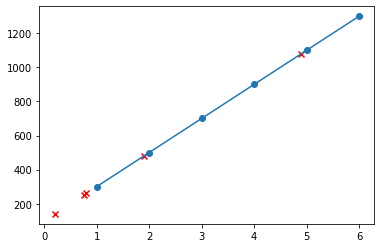

In [40]:
plt.plot(x_train, y_train)
plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test, marker="x", c="r")